In [1]:
import sklearn
import pickle
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os, math, sys
import pandas as pd
import cv2
import csv


In [2]:
#cargar de un pickle

with open('/home/jupyter/Pickles/Descriptores_NovaBD/train.pickle', 'rb') as train:
    train_list = pickle.load(train)


with open('/home/jupyter/Pickles/Descriptores_NovaBD/validation.pickle', 'rb') as validation:
    validation_list = pickle.load(validation)

In [3]:
with open('/home/jupyter/Pickles/Imagenes_NovaBD/BD_train.pickle', 'rb') as trains:
    images_train_list = pickle.load(trains)


with open('/home/jupyter/Pickles/Imagenes_NovaBD/BD_validation.pickle', 'rb') as validations:
    images_validation_list = pickle.load(validations)

In [4]:
#cerca con todas las imagenes
v_val = np.reshape(validation_list, (1673,4096))
v_train = np.reshape(train_list, (1671,4096))

In [5]:
v_train = sklearn.preprocessing.normalize(train_list, norm='l2', axis=1, copy=True, return_norm=False)
v_val = sklearn.preprocessing.normalize(v_val, norm='l2', axis=1, copy=True, return_norm=False)

In [6]:
train_list_t = v_train.transpose()

In [7]:
res= np.matmul(v_val, train_list_t)

In [8]:
ranks = np.argsort(res, axis=1)[:,::-1]
x_train_img = []
x_val_img = []

In [9]:
k = 0
for k in range (1673):
    x_val_img.append(np.array(images_validation_list[k]))

In [10]:
j = 0
for j in range (1671):
    x_train_img.append(np.array(images_train_list[j]))

In [11]:
aux = []

for root, dirs, files in os.walk("/home/jupyter/NovaBD/Val/", topdown=False): 
    for name in files: 
        aux.append(name)

In [12]:
aux1 = []

for root, dirs, files in os.walk("/home/jupyter/NovaBD/Train/", topdown=False): 
    for name in files: 
        aux.append(name)

In [35]:
aux[0]

'sodneismnc.jpg'

In [42]:
h,w = (224, 224)
new_image= Image.new('RGB', (h*5,w*15))
# Visualize ranks of the 10 queries
offset = 0 # it will show results from query #'offset' to #offset+10
linea = []
w, h = 1671, 1673;
matriz = [[0 for x in range(w)] for y in range(h)]

#for q in range(len(v_val)):
for q in range(1673):
        ranks_q = ranks[q*(offset+1),:]
        #linea.append(aux[q])
        matriz[q][0] = aux(q)
        for i in range(1671):
            # Esto lo metemos en un vector llamado línea, que tenga como primera entrada la imagen de validacion.
            matriz[q][i] = aux[ranks_q[i]]
            #linea.append(aux[ranks_q[i]])
            #new_image.paste(Image.fromarray(x_train_img[ranks_q[i]]), (h*(1+i),w*q))
       
        with open('kaggle.csv', 'w', newline='') as csvfile:
            filewriter = csv.writer(csvfile, delimiter=',',
                    quotechar=' ', quoting=csv.QUOTE_MINIMAL)
            filewriter.writerow(linea)
        linea = []
        # visualize query
        #ima_q = Image.fromarray(x_val_img[q*(offset+1)])
        #ima_q = ImageOps.expand(ima_q, border = 10, fill='orange')
        #new_image.paste(ima_q, (0,w*q))

TypeError: 'list' object is not callable

In [ ]:
matriz[0]

In [27]:
row1 = ["Query", "RetrievedDocuments"]
with open("kaggle1.csv", "w") as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(row1)
    for z in range(1673):
        wr.writerow(matriz[z])

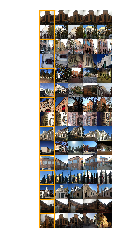

In [32]:
plt.imshow(new_image)
plt.axis('off')
plt.show()